In [1]:
import json

import geojson
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from networkx.readwrite import json_graph
from shapely import wkt
from shapely.geometry import LineString, mapping, Point
import os

from utils import print_graph_info

from utils import osmnx_to_geopandas

from railroad import save_graph

In [2]:
# # Download the graphs for each place
# G_reykjavik = ox.graph_from_place("Reykjavik, Iceland", network_type="drive")
# G_kopavogur = ox.graph_from_place("Kopavogur, Iceland", network_type="drive")

# print(f'{nx.is_connected(nx.to_undirected(G_reykjavik)) = }')
# print(f'{nx.is_connected(nx.to_undirected(G_kopavogur)) = }')

# # Merge the two graphs into one
# G = nx.compose(G_reykjavik, G_kopavogur)

# print(f'{nx.is_connected(nx.to_undirected(G)) = }')

In [3]:
north, south, east, west = 64.188968, 64.033992, -21.640345, -22.083955


if os.path.exists('../data/reykjavik_road_network.graphml'):
    G = ox.load_graphml(filepath="../data/reykjavik_road_network.graphml")
    print('Loaded graph from file')
else:
    G = ox.graph_from_bbox(north, south, east, west, network_type="drive")
    ox.save_graphml(G, filepath="../data/reykjavik_road_network.graphml")
    print('Saved graph to file')

/tmp/ipykernel_21972/1901846073.py:8: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive")
/tmp/ipykernel_21972/1901846073.py:8: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type="drive")


Saved graph to file


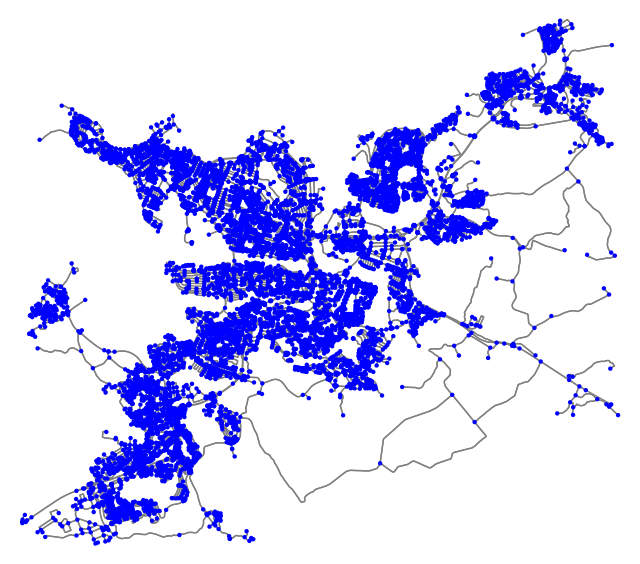

In [4]:
fig, ax = ox.plot_graph(G, node_size=10, node_color="blue",
                        edge_color="gray", bgcolor="white")
plt.show()

In [5]:
print(f'{nx.is_connected(nx.to_undirected(G)) = }')

nx.is_connected(nx.to_undirected(G)) = True


In [6]:
G.nodes[13472322]

{'y': 64.1059415, 'x': -21.7770724, 'street_count': 3}

In [7]:
# Add geometry to nodes in G
for node, data in G.nodes(data=True):
    if 'x' in data and 'y' in data:
        data['geometry'] = Point(data['x'], data['y'])

# Verify the geometry has been added
for node, data in G.nodes(data=True):
    if 'geometry' in data:
        data.pop('x', None)
        data.pop('y', None)
print(G.nodes[13472322]['geometry'])

POINT (-21.7770724 64.1059415)


In [8]:
print(G.edges[(13472322, 13472744, 0)])
print(type(G.edges[(13472322, 13472744, 0)]['geometry']))

{'osmid': [117632085, 516197559], 'oneway': False, 'lanes': ['3', '2'], 'ref': '1', 'name': 'Suðurlandsvegur', 'highway': 'trunk', 'maxspeed': '80', 'reversed': False, 'length': 697.773, 'geometry': <LINESTRING (-21.777 64.106, -21.777 64.106, -21.778 64.106, -21.778 64.107,...>}
<class 'shapely.geometry.linestring.LineString'>


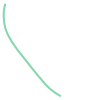

In [9]:
G.edges[(13472322, 13472744, 0)]['geometry']

In [10]:
save_graph(G, "../data/reykjavik_road_graph.json")

In [11]:
nodes_gdf, edges_gdf = osmnx_to_geopandas(G)

# Save to GeoJSON
edges_gdf.to_file("../data/reykjavik_road_network.geojson", driver="GeoJSON")
nodes_gdf.to_file(
    "../data/reykjavik_road_network_nodes.geojson", driver="GeoJSON")

In [12]:
edges_gdf

,osmid,lanes,ref,name,highway,maxspeed,junction,oneway,reversed,length,geometry,edge_id,bridge,width,access,tunnel
0,157591872,2,41,Hlíðartorg,trunk,60,roundabout,True,False,18.993,"LINESTRING (-21.93747 64.06727, -21.93754 64.0...",12885866->12885923,NaN,NaN,NaN,NaN
1,"[677773059, 5042103]",2,41,Reykjanesbraut,trunk,60,NaN,True,False,653.666,"LINESTRING (-21.93747 64.06727, -21.93768 64.0...",12885866->1573411414,NaN,NaN,NaN,NaN
2,5188296,2,NaN,Flatahraun,unclassified,40,NaN,False,False,35.437,"LINESTRING (-21.93995 64.07616, -21.93970 64.0...",12885876->1660480490,NaN,NaN,NaN,NaN
3,152190880,2,40,FH-Torg,primary,60,roundabout,True,False,16.131,"LINESTRING (-21.93995 64.07616, -21.93998 64.0...",12885876->12885952,NaN,NaN,NaN,NaN
4,157591872,2,41,Hlíðartorg,trunk,60,roundabout,True,False,8.738,"LINESTRING (-21.93785 64.06726, -21.93793 64.0...",12885923->12886003,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21511,1333711253,NaN,NaN,Garðatorg,residential,NaN,NaN,False,False,9.560,"LINESTRING (-21.92010 64.08806, -21.92026 64.0...",12339218088->710642827,NaN,NaN,NaN,NaN
21512,"[56774708, 1333711253, 1292421982]",NaN,NaN,Garðatorg,residential,30,NaN,False,True,207.606,"LINESTRING (-21.92010 64.08806, -21.91995 64.0...",12339218088->710642841,NaN,NaN,NaN,NaN
21513,671408683,1,412,Vífilsstaðavegur,secondary,50,NaN,True,False,9.772,"LINESTRING (-21.92037 64.08790, -21.92054 64.0...",12339218090->6287414312,NaN,NaN,NaN,NaN
21514,1333711252,NaN,NaN,Garðatorg,residential,NaN,NaN,True,False,22.878,"LINESTRING (-21.92037 64.08790, -21.92024 64.0...",12339218090->12339218088,NaN,NaN,NaN,NaN


In [13]:
nodes_gdf

,street_count,geometry,node_id,highway
0,3,POINT (-21.93747 64.06727),12885866,NaN
1,3,POINT (-21.93995 64.07616),12885876,NaN
2,3,POINT (-21.93785 64.06726),12885923,NaN
3,3,POINT (-21.93808 64.06705),12885924,NaN
4,3,POINT (-21.94063 64.07593),12885930,NaN
...,...,...,...,...
10595,1,POINT (-21.97357 64.05188),12335652303,NaN
10596,3,POINT (-21.92048 64.08783),12339218087,NaN
10597,3,POINT (-21.92010 64.08806),12339218088,NaN
10598,4,POINT (-21.92037 64.08790),12339218090,NaN


In [14]:
edges_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21516 entries, 0 to 21515
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     21516 non-null  object  
 1   lanes     11152 non-null  object  
 2   ref       1445 non-null   object  
 3   name      20719 non-null  object  
 4   highway   21516 non-null  object  
 5   maxspeed  20204 non-null  object  
 6   junction  1268 non-null   object  
 7   oneway    21516 non-null  bool    
 8   reversed  21516 non-null  object  
 9   length    21516 non-null  float64 
 10  geometry  21516 non-null  geometry
 11  edge_id   21516 non-null  object  
 12  bridge    157 non-null    object  
 13  width     201 non-null    object  
 14  access    47 non-null     object  
 15  tunnel    25 non-null     object  
dtypes: bool(1), float64(1), geometry(1), object(13)
memory usage: 2.5+ MB


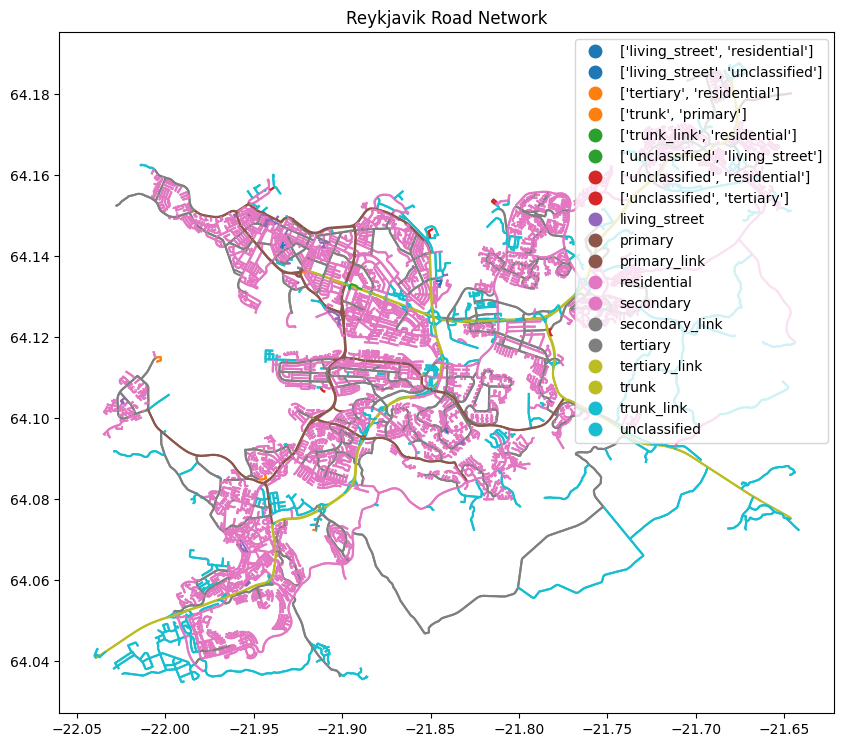

In [15]:
# Plotting the GeoDataFrame
edges_gdf.plot(figsize=(10, 10), column='highway', legend=True)
plt.title("Reykjavik Road Network")
plt.show()